<center>
    <img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

    Universidade de Fortaleza
    MBA em Ciência de Dados
    X565 - Modelos de Machine Learning
    Professor: Caio Cesar Ponte Silva
    Jose Antoniel de Lima - 2318502    
</center>

---

## Trabalho Modelos de Machine Learning:

1. Definição do Problema:
* Qual o cenário em que está trabalhando?
    - O objetivo deste projeto é desenvolver um modelo preditivo para prever a variação percentual diária das ações da Petrobras.
* Qual a problemática que está tentando resolver?
    - O foco é prever a variação percentual das ações da Petrobras para o próximo dia, auxiliando na tomada de decisões de investimento.
* Quais os dados utilizados e como foram obtidos?
    - Os dados incluem os preços de fechamento das ações da Petrobras, o índice Ibovespa, e os preços internacionais do barril de petróleo.
    - Os dados são obtidos a partir da plataforma Yahoo Finance.

In [1]:
import pandas as pd
import yfinance as yf

## Série histórica do CL=F
#### O West Texas Intermediate (WTI) é um tipo de petróleo bruto leve e doce que serve como referência principal para os preços de petróleo nos Estados Unidos. É conhecido por seu baixo teor de enxofre (daí o termo "doce") e baixa densidade (o que o torna "leve").

In [2]:
df_clf = yf.download("CL=F", start="2000-01-01", end="2024-07-31")
df_clf = df_clf.reset_index()
df_clf.columns = df_clf.columns.map(lambda x: x[0])

[*********************100%***********************]  1 of 1 completed


## Série histórica do BZ=F
#### Petróleo Brent: O Brent é um tipo de petróleo extraído principalmente do Mar do Norte. Ele é ligeiramente mais pesado e com maior teor de enxofre do que o WTI, mas ainda é considerado um petróleo leve e doce. É a referência mais usada para os preços de petróleo globalmente, com muitos contratos de petróleo no mundo vinculados ao Brent.

In [3]:
df_bzf = yf.download("BZ=F", start="2000-01-01", end="2024-07-31")
df_bzf = df_bzf.reset_index()
df_bzf.columns = df_bzf.columns.map(lambda x: x[0])

[*********************100%***********************]  1 of 1 completed


### Dados históricos das ações da Petrobras

In [4]:
df_petr4 = yf.download("PETR4.SA", start="2000-01-01", end="2024-07-31")
df_petr4 = df_petr4.reset_index()
df_petr4.columns = df_petr4.columns.map(lambda x: x[0])

[*********************100%***********************]  1 of 1 completed


### Dados históricos do índice Ibovespa

In [5]:
# Baixando os dados históricos do Ibovespa
df_ibov = yf.download("^BVSP", start="2000-01-01", end="2024-07-31")
df_ibov = df_ibov.reset_index()
df_ibov.columns = df_ibov.columns.map(lambda x: x[0])

[*********************100%***********************]  1 of 1 completed


In [6]:
# Normaliza o dataset pelas datas, fazendo interserções
def intersection_datasets(df_clf, df_bzf, df_petr4, df_ibov):
    df_clf['Date'].max(), df_bzf['Date'].max(), df_petr4['Date'].max(), df_ibov['Date'].max()
    
    index_clf = pd.Index(df_clf['Date'])
    index_bzf = pd.Index(df_bzf['Date'])
    index_ibov = pd.Index(df_ibov['Date'])
    index_petr4 = pd.Index(df_petr4['Date'])

    # Encontrando a interseção das datas entre os DataFrames
    common_dates = index_clf.intersection(index_bzf).intersection(index_ibov).intersection(index_petr4)

    # Filtrando os DataFrames para manter apenas as datas comuns
    df_clf_filtered = df_clf[df_clf['Date'].isin(common_dates)]
    df_bzf_filtered = df_bzf[df_bzf['Date'].isin(common_dates)]
    df_ibov_filtered = df_ibov[df_ibov['Date'].isin(common_dates)]
    df_petr4_filtered = df_petr4[df_petr4['Date'].isin(common_dates)]

    df_clf_filtered.set_index('Date', inplace=True)
    df_bzf_filtered.set_index('Date', inplace=True)
    df_ibov_filtered.set_index('Date', inplace=True)
    df_petr4_filtered.set_index('Date', inplace=True)


    df_petr4_filtered = pd.DataFrame(df_petr4_filtered)
    df_petr4_filtered['CLF_Close'] = df_clf_filtered['Close']
    df_petr4_filtered['BZF_Close'] = df_bzf_filtered['Close']
    df_petr4_filtered['IBOV_Close'] = df_ibov_filtered['Close']
    df_petr4_filtered.reset_index(inplace=True)

    return df_petr4_filtered

In [7]:
df_petr4_filtered = intersection_datasets(df_clf, df_bzf, df_petr4, df_ibov)

In [8]:
df = pd.DataFrame(df_petr4_filtered)
df.to_csv('petr4_dataset.csv', index=False)

2. Análise Exploratória dos Dados:

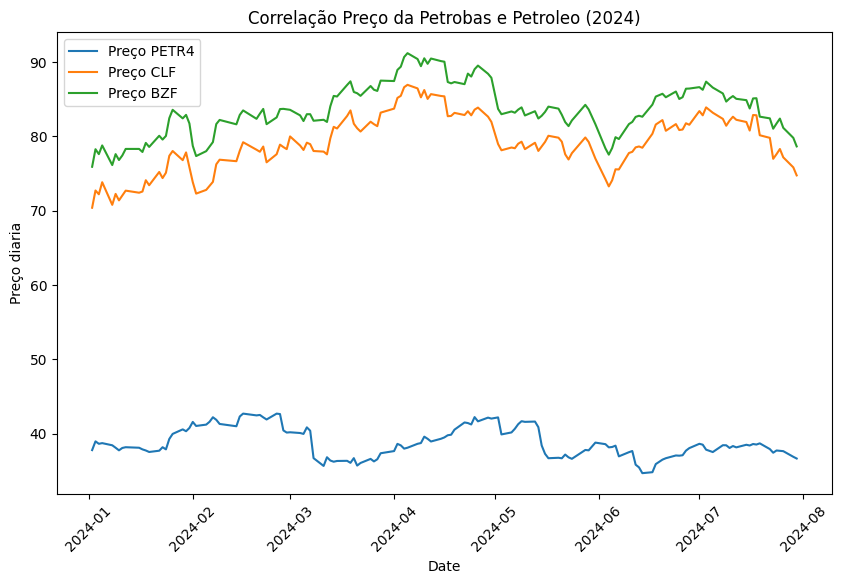

In [9]:
import matplotlib.pyplot as plt

df_plot = df.copy()

df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot = df_plot[df_plot['Date'] >= '2024-01-01']
plt.figure(figsize=(10, 6))

plt.plot(df_plot['Date'], df_plot['Close'], label='Preço PETR4')
plt.plot(df_plot['Date'], df_plot['CLF_Close'], label='Preço CLF')
plt.plot(df_plot['Date'], df_plot['BZF_Close'], label='Preço BZF')

plt.title('Correlação Preço da Petrobas e Petroleo (2024)')
plt.xlabel('Date')
plt.ylabel('Preço diaria')
plt.xticks(rotation=45)
plt.legend()
plt.show()

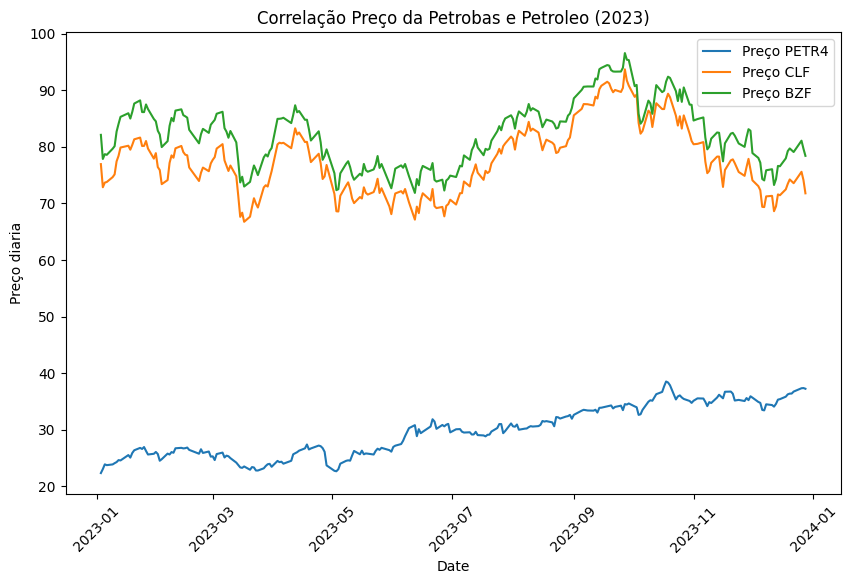

In [10]:
import matplotlib.pyplot as plt

df_plot = df.copy()

df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot = df_plot[(df_plot['Date'] >= '2023-01-01') & (df_plot['Date'] <= '2023-12-31')]
plt.figure(figsize=(10, 6))

plt.plot(df_plot['Date'], df_plot['Close'], label='Preço PETR4')
plt.plot(df_plot['Date'], df_plot['CLF_Close'], label='Preço CLF')
plt.plot(df_plot['Date'], df_plot['BZF_Close'], label='Preço BZF')

plt.title('Correlação Preço da Petrobas e Petroleo (2023)')
plt.xlabel('Date')
plt.ylabel('Preço diaria')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Engenharia de features
 - Bandas de Bollinger
 - RSI (Relative Strength Index)
 - Média de Volume
 - OBV (On-Balance Volume)
 - Variação percentual diária

As Bandas de Bollinger são um indicador técnico usado para analisar a volatilidade de um ativo financeiro e identificar condições de sobrecompra ou sobrevenda.

Consistem em três linhas:
- Média Móvel Simples (SMA): A linha do meio, geralmente uma média móvel de 20 períodos.
- Banda Superior: A SMA mais 2 vezes o desvio padrão dos preços.
- Banda Inferior: A SMA menos 2 vezes o desvio padrão dos preços.
- Volatilidade: As bandas se expandem quando a volatilidade aumenta e se contraem quando a volatilidade diminui.

In [11]:
def bollinger_bands(df, window=20, no_of_std=2):
    df['BB_Middle'] = df['Close'].rolling(window=window).mean()
    df['BB_Upper'] = df['BB_Middle'] + no_of_std * df['Close'].rolling(window=window).std()
    df['BB_Lower'] = df['BB_Middle'] - no_of_std * df['Close'].rolling(window=window).std()
    return df

O RSI (Relative Strength Index) é um indicador técnico usado para medir a força ou fraqueza de um ativo com base nos movimentos recentes de preço, auxiliando na identificação de condições de sobrecompra ou sobrevenda.

Resumo:
- Cálculo: O RSI é calculado com base na média dos ganhos e perdas dos preços de fechamento em um determinado período, geralmente 14 dias.
- Escala: O RSI varia de 0 a 100.
- Sobrecompra: Quando o RSI está acima de 70, o ativo pode estar sobrecomprado.
- Sobrevenda: Quando o RSI está abaixo de 30, o ativo pode estar sobrevendido.

In [12]:
def compute_rsi(df, window):
    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

O OBV (On-Balance Volume) é um indicador técnico que relaciona o volume de negociação com os movimentos de preço de um ativo, ajudando a confirmar tendências e identificar potenciais reversões.

Cálculo:
 - Volume positivo: Se o preço de fechamento de hoje é maior que o de ontem, o volume de hoje é adicionado ao OBV.
 - Volume negativo: Se o preço de fechamento de hoje é menor que o de ontem, o volume de hoje é subtraído do OBV.
 - Volume neutro: Se o preço de fechamento de hoje é igual ao de ontem, o OBV permanece inalterado.

In [13]:
def compute_obv(df):
    df['OBV'] = (df['Volume'] * ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1))).cumsum()
    return df

Calculo de média de volume de negociações mais variação diaria 

In [14]:
def compute_avg(df, window=20):
    df['Volume_MA'] = df['Volume'].rolling(window=window).mean()
    return df

def compute_pct_change(df):
    df.loc[:, 'Future_Close'] = df['Close'].shift(-1)
    df.loc[:, 'Pct_Change'] = ((df['Future_Close'] - df['Close']) * 100) / df['Close']    
    return pd.DataFrame(df)

Calcula todos os indicadores e adiciona os resultados no dataframe

In [15]:
def compute_indicators(df):
    df = bollinger_bands(df=df, window=20, no_of_std=2)
    df['RSI'] = compute_rsi(df, 14)
    df = compute_avg(df, window=20)
    df = compute_obv(df,)
    df = compute_pct_change(df)
    return df.dropna()

In [16]:
df = compute_indicators(df)
df.to_csv('petr4_dataset_engine_features.csv', index=False)

In [17]:
features = ['Close','RSI', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'Volume_MA', 'OBV', 'CLF_Close', 'BZF_Close', 'IBOV_Close']
X = df[features]
y = df['Pct_Change']

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, explained_variance_score

train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


def train_random_forest(x_train, x_test, y_train, y_test):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(x_train, y_train)

    rf_pred = rf_model.predict(x_test)
    # Calcule e imprima as métricas
    mae = mean_absolute_error(y_test, rf_pred)    
    rmse = mean_squared_error(y_test, rf_pred, squared=False)    
    r2 = r2_score(y_test, rf_pred)
    

    print(f'Avaliação RandomForestRegressor:')
    print(f'Mean Absolute Error (MAE): {mae}')    
    print(f'Root Mean Squared Error (RMSE): {rmse}')    
    print(f'R-squared (R²): {r2}')    
    return rf_model, rf_pred

In [19]:
from sklearn.linear_model import LinearRegression

def train_linear_regression(x_train, x_test, y_train, y_test):
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)

    lr_pred = lr_model.predict(x_test)
    # Calcule e imprima as métricas
    mae = mean_absolute_error(y_test, lr_pred)    
    rmse = mean_squared_error(y_test, lr_pred, squared=False)    
    r2 = r2_score(y_test, lr_pred)    

    print(f'Avaliação LinearRegression:')
    print(f'Mean Absolute Error (MAE): {mae}')    
    print(f'Root Mean Squared Error (RMSE): {rmse}')    
    print(f'R-squared (R²): {r2}')    
    return lr_model, lr_pred

In [20]:
from sklearn.svm import SVR

def train_svr(x_train, x_test, y_train, y_test):
    svr_model = SVR(kernel='rbf')

    svr_model.fit(x_train, y_train)

    svr_pred = svr_model.predict(x_test)
    
    # Calcule e imprima as métricas
    mae = mean_absolute_error(y_test, svr_pred)    
    rmse = mean_squared_error(y_test, svr_pred, squared=False)    
    r2 = r2_score(y_test, svr_pred)    

    print(f'Avaliação SVR:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')    
    return svr_model, svr_pred

In [21]:
lr_model, lr_pred = train_linear_regression(X_train, X_test, y_train, y_test)

Avaliação LinearRegression:
Mean Absolute Error (MAE): 1.714728589292005
Root Mean Squared Error (RMSE): 2.4015393846581095
R-squared (R²): -0.0027307526616064948


c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
rf_model, rf_pred = train_random_forest(X_train, X_test, y_train, y_test)

Avaliação RandomForestRegressor:
Mean Absolute Error (MAE): 3.0961173363870693
Root Mean Squared Error (RMSE): 3.958346014211088
R-squared (R²): -1.7241587819390563


c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [23]:
svr_model, svr_pred = train_svr(X_train, X_test, y_train, y_test)

Avaliação SVR:
Mean Absolute Error (MAE): 1.7207503447540315
Root Mean Squared Error (RMSE): 2.409779499155942
R-squared (R²): -0.009623657710818412


c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Comparativo entre Regressão Linear, Random Forest e SVR

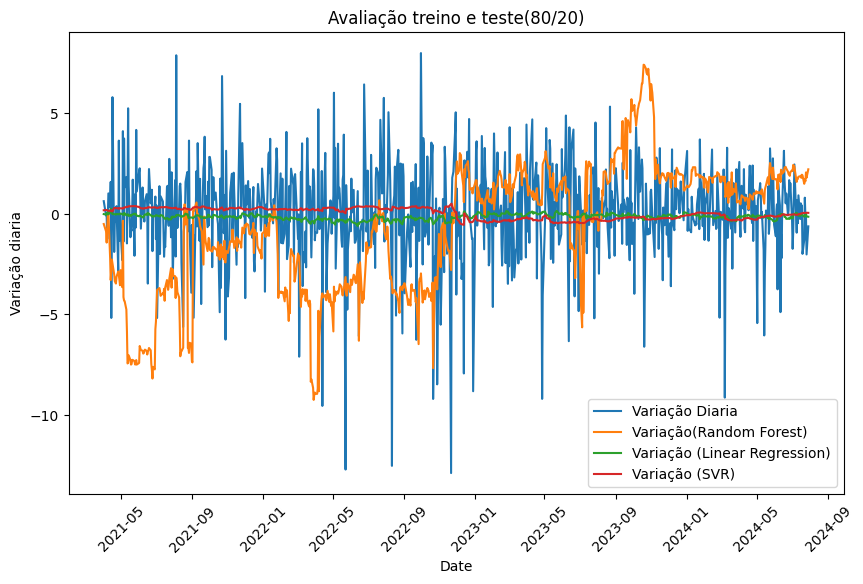

In [24]:
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(df[train_size:])
df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot['LR_Change'] = lr_pred
df_plot['RF_Change'] = rf_pred
df_plot['SVR_Change'] = svr_pred
plt.figure(figsize=(10, 6))

plt.plot(df_plot['Date'], df_plot['Pct_Change'], label='Variação Diaria')
plt.plot(df_plot['Date'], df_plot['RF_Change'], label='Variação(Random Forest)')
plt.plot(df_plot['Date'], df_plot['LR_Change'], label='Variação (Linear Regression)')
plt.plot(df_plot['Date'], df_plot['SVR_Change'], label='Variação (SVR)')

plt.title('Avaliação treino e teste(80/20)')
plt.xlabel('Date')
plt.ylabel('Variação diaria')
plt.xticks(rotation=45)
plt.legend()
plt.show()

 ### Otimizando o melhor modelo testado (Random Forest)

In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Definindo o modelo base
rf = RandomForestRegressor(random_state=42)

# Definindo a grade de hiperparâmetros (com maior intervalo)
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
print(f"Best Parameters: {random_search.best_params_}")

# Avaliando o modelo otimizado
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Mean Squared Error: 7.368958703884708


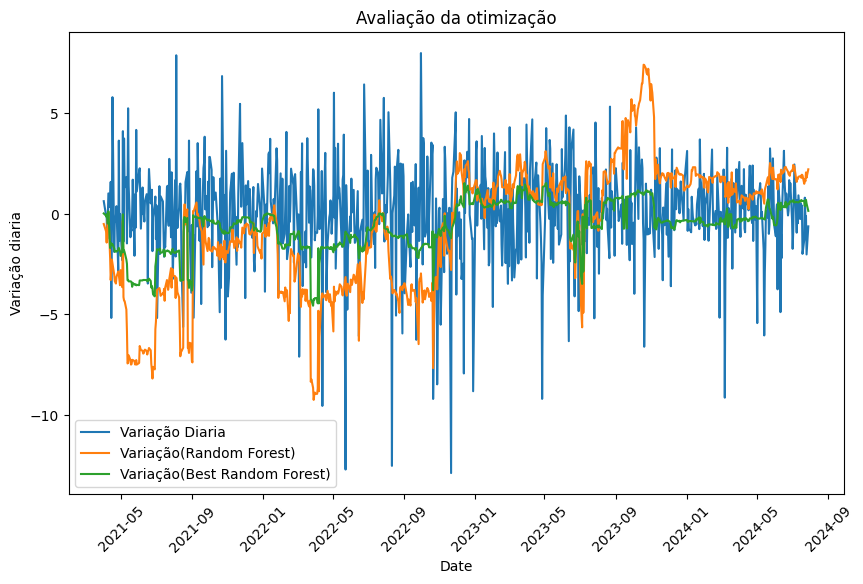

In [26]:
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(df[train_size:])
df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot['Best_Change'] = y_pred
df_plot['RF_Change'] = rf_pred

plt.figure(figsize=(10, 6))

plt.plot(df_plot['Date'], df_plot['Pct_Change'], label='Variação Diaria')
plt.plot(df_plot['Date'], df_plot['RF_Change'], label='Variação(Random Forest)')
plt.plot(df_plot['Date'], df_plot['Best_Change'], label='Variação(Best Random Forest)')

plt.title('Avaliação da otimização')
plt.xlabel('Date')
plt.ylabel('Variação diaria')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Validando modelos com dados não utilizado em treino e teste

In [27]:
df_clf_valid = yf.download("CL=F", start="2024-07-01", end="2024-08-31")
df_clf_valid = df_clf_valid.reset_index()
df_clf_valid.columns = df_clf_valid.columns.map(lambda x: x[0])

[*********************100%***********************]  1 of 1 completed


In [28]:
df_bzf_valid = yf.download("BZ=F", start="2024-07-01", end="2024-08-31")
df_bzf_valid = df_bzf_valid.reset_index()
df_bzf_valid.columns = df_bzf_valid.columns.map(lambda x: x[0])

[*********************100%***********************]  1 of 1 completed


In [29]:
# Baixando os dados históricos do Ibovespa
df_ibov_valid = yf.download("^BVSP", start="2024-07-01", end="2024-08-31")
df_ibov_valid = df_ibov_valid.reset_index()
df_ibov_valid.columns = df_ibov_valid.columns.map(lambda x: x[0])

[*********************100%***********************]  1 of 1 completed


In [30]:
df_petr4_valid = yf.download("PETR4.SA", start="2024-07-01", end="2024-08-31")
df_petr4_valid = df_petr4_valid.reset_index()
df_petr4_valid.columns = df_petr4_valid.columns.map(lambda x: x[0])

[*********************100%***********************]  1 of 1 completed


In [31]:
df_valid = intersection_datasets(df_clf_valid, df_bzf_valid, df_petr4_valid, df_ibov_valid)

In [32]:
df_valid = compute_indicators(df_valid)
df_valid = df_valid[df_valid['Date'] >= '2024-07-31']

In [33]:
features = ['Close','RSI', 'BB_Upper', 'BB_Middle', 'BB_Lower', 'Volume_MA', 'OBV', 'CLF_Close', 'BZF_Close', 'IBOV_Close']
X_valid = df_valid[features]

In [34]:
df_valid['Best_Change'] = best_rf.predict(X_valid)
df_valid['RF_Change'] = rf_model.predict(X_valid)

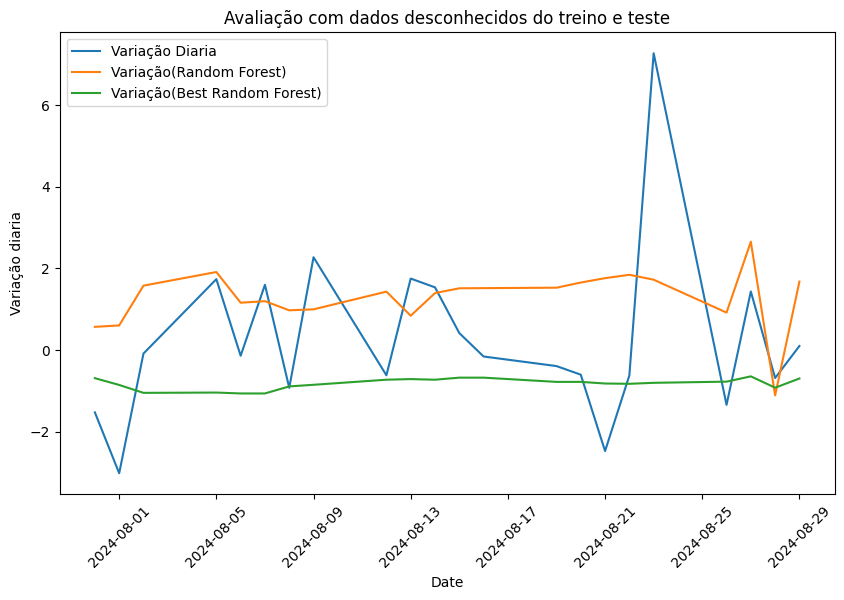

In [35]:
import matplotlib.pyplot as plt

df_plot = df_valid.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'])

plt.figure(figsize=(10, 6))

plt.plot(df_plot['Date'], df_plot['Pct_Change'], label='Variação Diaria')
plt.plot(df_plot['Date'], df_plot['RF_Change'], label='Variação(Random Forest)')
plt.plot(df_plot['Date'], df_plot['Best_Change'], label='Variação(Best Random Forest)')

plt.title('Avaliação com dados desconhecidos do treino e teste')
plt.xlabel('Date')
plt.ylabel('Variação diaria')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Usando SelectKBest para selecionar melhores features

In [36]:
from sklearn.feature_selection import SelectKBest, r_regression

X = df.drop(columns=['Date', 'Pct_Change', 'Adj Close', 'Future_Close'])
y = df[['Pct_Change']]

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Seleciona as 5 melhores features
kbest = SelectKBest(score_func=r_regression, k=5)
X_train_selected = kbest.fit_transform(X_train, y_train)
X_test_selected = kbest.transform(X_test)

c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# Obtendo os nomes das features selecionadas
selected_features = X.columns[kbest.get_support()]

print("Features selecionadas:", selected_features)

Features selecionadas: Index(['Volume', 'IBOV_Close', 'RSI', 'Volume_MA', 'OBV'], dtype='object')


In [38]:
X = df[selected_features]
y = df[['Pct_Change']]

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

lr_kbest_model, lr_kbest_pred = train_linear_regression(X_train, X_test, y_train, y_test)

Avaliação LinearRegression:
Mean Absolute Error (MAE): 1.7107599249371266
Root Mean Squared Error (RMSE): 2.4147867789134843
R-squared (R²): -0.0138238100344934


c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
rf_kbest_model, rf_kbest_pred = train_random_forest(X_train, X_test, y_train, y_test)

c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Avaliação RandomForestRegressor:
Mean Absolute Error (MAE): 2.0446307788468796
Root Mean Squared Error (RMSE): 2.7264322253345163
R-squared (R²): -0.2923921765835864


c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
svr_kbest_model, svr_kbest_pred = train_random_forest(X_train, X_test, y_train, y_test)

c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Avaliação RandomForestRegressor:
Mean Absolute Error (MAE): 2.0446307788468796
Root Mean Squared Error (RMSE): 2.7264322253345163
R-squared (R²): -0.2923921765835864


c:\Users\Antoniel Lima\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


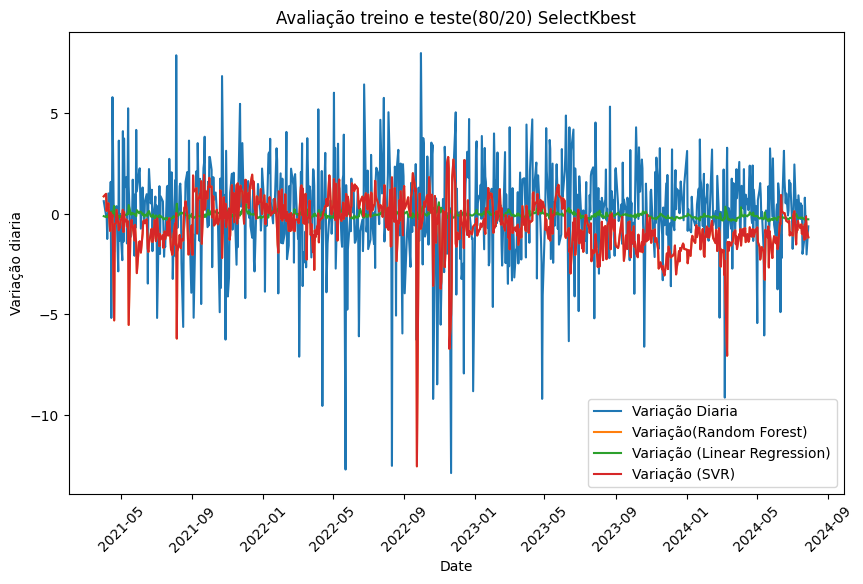

In [41]:
import matplotlib.pyplot as plt

df_plot = pd.DataFrame(df[train_size:])
df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot['LR_Change'] = lr_kbest_pred
df_plot['RF_Change'] = rf_kbest_pred
df_plot['SVR_Change'] = svr_kbest_pred
plt.figure(figsize=(10, 6))

plt.plot(df_plot['Date'], df_plot['Pct_Change'], label='Variação Diaria')
plt.plot(df_plot['Date'], df_plot['RF_Change'], label='Variação(Random Forest)')
plt.plot(df_plot['Date'], df_plot['LR_Change'], label='Variação (Linear Regression)')
plt.plot(df_plot['Date'], df_plot['SVR_Change'], label='Variação (SVR)')

plt.title('Avaliação treino e teste(80/20) SelectKbest')
plt.xlabel('Date')
plt.ylabel('Variação diaria')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [42]:
X_valid = df_valid[selected_features]

In [43]:
df_valid['LR_Change'] = lr_kbest_model.predict(X_valid)
df_valid['RF_Change'] = rf_kbest_model.predict(X_valid)
df_valid['SVR_Change'] = svr_kbest_model.predict(X_valid)

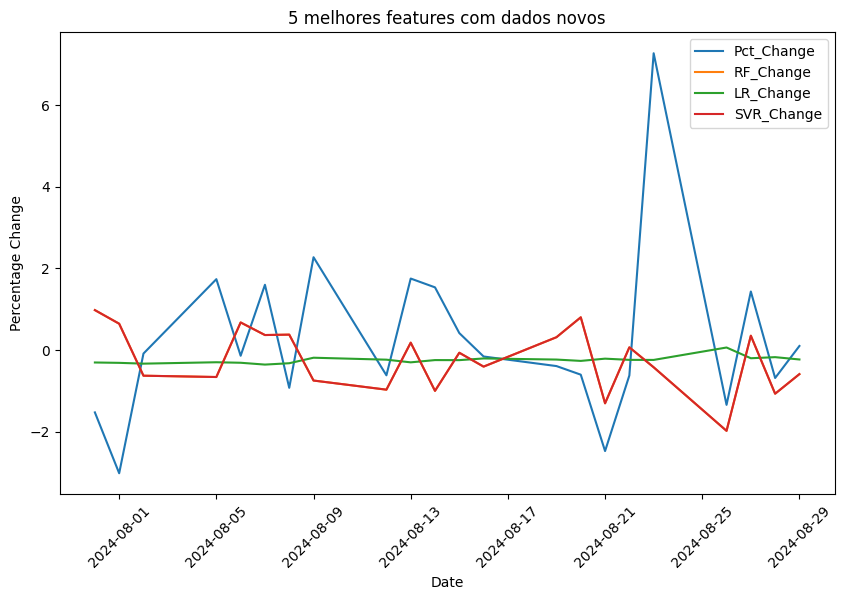

In [44]:
import matplotlib.pyplot as plt

df_valid['Date'] = pd.to_datetime(df_valid['Date'])

plt.figure(figsize=(10, 6))

plt.plot(df_valid['Date'], df_valid['Pct_Change'], label='Pct_Change')
plt.plot(df_valid['Date'], df_valid['RF_Change'], label='RF_Change')
plt.plot(df_valid['Date'], df_valid['LR_Change'], label='LR_Change')
plt.plot(df_valid['Date'], df_valid['SVR_Change'], label='SVR_Change')

plt.title('5 melhores features com dados novos')
plt.xlabel('Date')
plt.ylabel('Percentage Change')

plt.xticks(rotation=45)
plt.legend()
plt.show()